##**batch_size = 100**

##**epochs = 50**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1, Loss: 0.2543, Accuracy: 0.9244
Epoch 2, Loss: 0.1458, Accuracy: 0.9576
Epoch 3, Loss: 0.1215, Accuracy: 0.9650
Epoch 4, Loss: 0.1032, Accuracy: 0.9696
Epoch 5, Loss: 0.0936, Accuracy: 0.9727
Epoch 6, Loss: 0.0942, Accuracy: 0.9729
Epoch 7, Loss: 0.0860, Accuracy: 0.9762
Epoch 8, Loss: 0.0760, Accuracy: 0.9787
Epoch 9, Loss: 0.0755, Accuracy: 0.9798
Epoch 10, Loss: 0.0704, Accuracy: 0.9803
Epoch 11, Loss: 0.0661, Accuracy: 0.9816
Epoch 12, Loss: 0.0698, Accuracy: 0.9818
Epoch 13, Loss: 0.0610, Accuracy: 0.9836
Epoch 14, Loss: 0.0610, Accuracy: 0.9842
Epoch 15, Loss: 0.0610, Accuracy: 0.9842
Epoch 16, Loss: 0.0536, Accuracy: 0.9859
Epoch 17, Loss: 0.0670, Accuracy: 0.9836
Epoch 18, Loss: 0.0622, Accuracy: 0.9836
Epoch 19, Loss: 0.0691, Accuracy: 0.9831
Epoch 20, Loss: 0.0483, Accuracy: 0.9868
Epoch 21, Loss: 0.0511, Accuracy: 0.9873
Epoch 22, Loss: 0.0596, Accuracy: 0.9863
Epoch 23, Loss: 0.0636, Accuracy: 0.9854
Epoch 24, Loss:

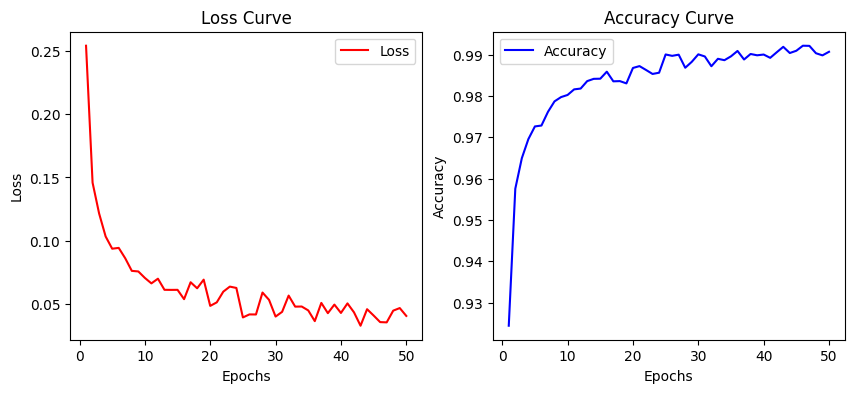

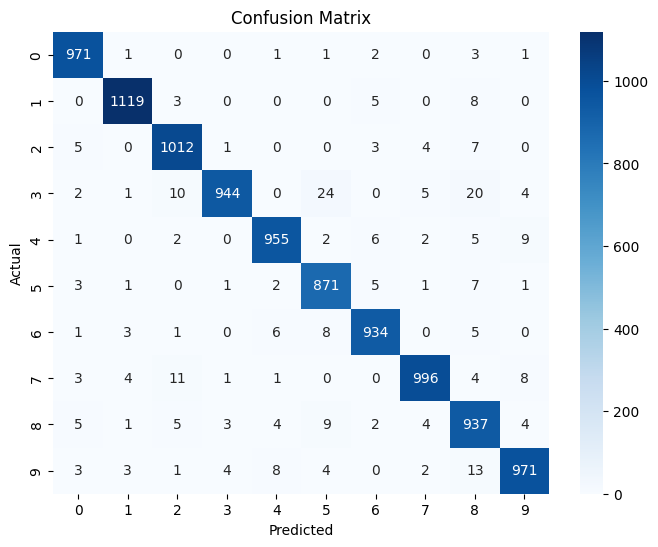

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.framework import ops

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape input data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)  # Flattening 28x28 images
x_test = x_test.reshape(-1, 784)

# One-hot encoding for labels
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]

# Reset default graph
ops.reset_default_graph()

# Define placeholders
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

# Define model parameters
def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.1))

W1 = init_weights([784, 128])
b1 = tf.Variable(tf.zeros([128]))

W2 = init_weights([128, 64])
b2 = tf.Variable(tf.zeros([64]))

W3 = init_weights([64, 10])
b3 = tf.Variable(tf.zeros([10]))

# Feed-forward pass
def forward_propagation(X):
    z1 = tf.matmul(X, W1) + b1
    a1 = tf.nn.relu(z1)

    z2 = tf.matmul(a1, W2) + b2
    a2 = tf.nn.relu(z2)

    z3 = tf.matmul(a2, W3) + b3
    return z3  # No softmax here

y_logits = forward_propagation(X)
y_pred = tf.nn.softmax(y_logits)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_logits, labels=Y))

# Back-propagation using Adam optimizer
learning_rate = 0.01
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)

# Accuracy metric
correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Training parameters
batch_size = 100
epochs = 50

loss_history = []
accuracy_history = []

start_time = time.time()

# Training
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        num_batches = x_train.shape[0] // batch_size

        for i in range(0, x_train.shape[0], batch_size):
            batch_x = x_train[i:i+batch_size]
            batch_y = y_train_oh[i:i+batch_size]
            _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y: batch_y})
            epoch_loss += batch_loss
            epoch_accuracy += batch_acc

        epoch_loss /= num_batches
        epoch_accuracy /= num_batches
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Evaluate on test set
    test_acc, y_test_pred = sess.run([accuracy, y_pred], feed_dict={X: x_test, Y: y_test_oh})
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Compute confusion matrix
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)
    conf_matrix = confusion_matrix(y_test, y_test_pred_labels)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Plot loss curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), loss_history, label='Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracy_history, label='Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
